# Case Study

Use dictionaries, zipping, user-defined functions, and list comprehensions to wrangle some of this wonderfully rich dataset

## Recap

iterator可用 next 一個一個印出來 (代表不一次放入memory中)，也可以用 * 和 list() 一次輸出

1. zip() 將兩個list的elements根據相同的index用tuple合併成pairs (這些pairs組成的zip object為iterator)
2. user-defined functions如果要回傳的值可以一次load進memory中，則用return；如果不行(物件太大)，則用yield
3. Comprehensions用一行程式碼來建立lists或dictionaries，分別用中括號和大括號包住

List comprehensions: <br/>
    [output for iterator variable in iterable]
    
Conditional comprehensions: <br/>
    [output + conditional on output for iterator variable in iterable + conditional on iterable]

## Import dataset

In [1]:
import pandas as pd

In [24]:
data = pd.read_csv("dataset/world_ind_pop_data.csv")
data.head()

,CountryName,CountryCode,Year,Total Population,Urban population (% of total)
0,Arab World,ARB,1960,9.249590e+07,31.285384
1,Caribbean small states,CSS,1960,4.190810e+06,31.597490
2,Central Europe and the Baltics,CEB,1960,9.140158e+07,44.507921
3,East Asia & Pacific (all income levels),EAS,1960,1.042475e+09,22.471132
4,East Asia & Pacific (developing only),EAP,1960,8.964930e+08,16.917679


In [25]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13374 entries, 0 to 13373
Data columns (total 5 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   CountryName                    13374 non-null  object 
 1   CountryCode                    13374 non-null  object 
 2   Year                           13374 non-null  int64  
 3   Total Population               13374 non-null  float64
 4   Urban population (% of total)  13374 non-null  float64
dtypes: float64(2), int64(1), object(2)
memory usage: 522.5+ KB


此dataframe共有13374個observations，import後佔用記憶體空間為 **522.5 KB**

## First step: build a dictionary from two lists

In [7]:
feature_names = ['CountryName', 'CountryCode', 'IndicatorName', 'IndicatorCode', 'Year', 'Value']
row_vals = ['Arab World', 'ARB', 
            'Adolescent fertility rate (births per 1,000 women ages 15-19)', 'SP.ADO.TFRT', '1960', '133.56090740552298']

# Zip lists: zipped_lists
zipped_lists = zip(feature_names, row_vals)

# Create a dictionary: rs_dict
rs_dict = dict(zipped_lists)

# Print the dictionary
print(rs_dict)

{'CountryName': 'Arab World', 'CountryCode': 'ARB', 'IndicatorName': 'Adolescent fertility rate (births per 1,000 women ages 15-19)', 'IndicatorCode': 'SP.ADO.TFRT', 'Year': '1960', 'Value': '133.56090740552298'}


## Second step: build a function to format step 1

Because we are using it many times

In [8]:
# Define lists2dict()
def lists2dict(list1, list2):
    """Return a dictionary where list1 provides
    the keys and list2 provides the values."""

    # Zip lists: zipped_lists
    zipped_lists = zip(list1, list2)

    # Create a dictionary: rs_dict
    rs_dict = dict(zipped_lists)

    # Return the dictionary
    return rs_dict

# Call lists2dict: rs_fxn
rs_fxn = lists2dict(feature_names, row_vals)

# Print rs_fxn
print(rs_fxn)

{'CountryName': 'Arab World', 'CountryCode': 'ARB', 'IndicatorName': 'Adolescent fertility rate (births per 1,000 women ages 15-19)', 'IndicatorCode': 'SP.ADO.TFRT', 'Year': '1960', 'Value': '133.56090740552298'}


**將data中所有的row與column用上面的函數變成dictionary**

In [17]:
column_names = data.columns
row_lists = [[data.iloc[j, i] for i in range(5)] for j in range(len(data))]
# row_lists = [list(data.iloc[j, :]) for j in range(len(data))]

# Print the first two lists in row_lists
print(row_lists[0])
print(row_lists[1])
print(row_lists[len(data)-1])

['Arab World', 'ARB', 1960, 92495902.0, 31.2853842116054]
['Caribbean small states', 'CSS', 1960, 4190810.0, 31.5974898513652]
['Zimbabwe', 'ZWE', 2014, 15245855.0, 32.501]


In [22]:
# Turn list of lists into list of dicts: list_of_dicts
list_of_dicts = [lists2dict(column_names, sublist) for sublist in row_lists]

# Print the first two dictionaries in list_of_dicts
for i in range(5):
    print(list_of_dicts[i])

print(list_of_dicts[len(data)-1])

{'CountryName': 'Arab World', 'CountryCode': 'ARB', 'Year': 1960, 'Total Population': 92495902.0, 'Urban population (% of total)': 31.2853842116054}
{'CountryName': 'Caribbean small states', 'CountryCode': 'CSS', 'Year': 1960, 'Total Population': 4190810.0, 'Urban population (% of total)': 31.5974898513652}
{'CountryName': 'Central Europe and the Baltics', 'CountryCode': 'CEB', 'Year': 1960, 'Total Population': 91401583.0, 'Urban population (% of total)': 44.5079211390026}
{'CountryName': 'East Asia & Pacific (all income levels)', 'CountryCode': 'EAS', 'Year': 1960, 'Total Population': 1042475394.0, 'Urban population (% of total)': 22.4711322042954}
{'CountryName': 'East Asia & Pacific (developing only)', 'CountryCode': 'EAP', 'Year': 1960, 'Total Population': 896492991.0, 'Urban population (% of total)': 16.917678848089302}
{'CountryName': 'Zimbabwe', 'CountryCode': 'ZWE', 'Year': 2014, 'Total Population': 15245855.0, 'Urban population (% of total)': 32.501}


---

由於檔案很大，佔用超過 500 KB 的記憶體空間，因此我們可以用多種方式，不要一次就把所有資料載入：

1. 使用generator一行一行處理資料，因此資料只會在被處理的時候才載入記憶體 (用file的readline，而不是用Pandas的read_csv)
2. 使用read_csv的chunksize參數，將資料分成數個chunks，並用迴圈和iterator一次一次載入分別處理

**方法1**除了針對大型資料可以減少記憶體佔用，也可以應對 **STREAMING data** (隨時間不斷寫入的資料)，因為如果一次就把全部資料載入記憶體，則之後新寫入的observations就不會被載入，也不會被處理到。**方法1**會不斷的去抓資料的下一行，直到沒有新的資料行才停止。

---

## 練習方法一：用file語法來產生generator並處理streaming file

寫一個 **一行一行** 載入 *world_ind_pop_data.csv* 的程式，並且統計 CountryName 這個column中各個國家的出現次數

先測驗前1000行 (1000行很少，因此可以直接載入)

In [29]:
# Open a connection to the file
with open("dataset/world_ind_pop_data.csv") as file:

    # Skip the column names (column name在第一行，因此先讀進來，並不做任何動作)
    file.readline()

    # Initialize an empty dictionary: counts_dict
    counts_dict = {}

    # Process only the first 1000 rows (這邊用迴圈，是因為現在只要測試1000行資料而已)
    for j in range(1000):

        # Split the current line into a list: line
        line = file.readline().split(',')

        # Get the value for the first column: first_col
        first_col = line[0]

        # If the column value is in the dict, increment its value
        if first_col in counts_dict.keys():
            counts_dict[first_col] += 1

        # Else, add to the dict and set value to 1
        else:
            counts_dict[first_col] = 1

# Print the resulting dictionary
print(counts_dict)

{'Arab World': 5, 'Caribbean small states': 5, 'Central Europe and the Baltics': 5, 'East Asia & Pacific (all income levels)': 5, 'East Asia & Pacific (developing only)': 5, 'Euro area': 5, 'Europe & Central Asia (all income levels)': 5, 'Europe & Central Asia (developing only)': 5, 'European Union': 5, 'Fragile and conflict affected situations': 5, 'Heavily indebted poor countries (HIPC)': 5, 'High income': 5, 'High income: nonOECD': 5, 'High income: OECD': 5, 'Latin America & Caribbean (all income levels)': 5, 'Latin America & Caribbean (developing only)': 5, 'Least developed countries: UN classification': 5, 'Low & middle income': 5, 'Low income': 5, 'Lower middle income': 5, 'Middle East & North Africa (all income levels)': 5, 'Middle East & North Africa (developing only)': 5, 'Middle income': 5, 'North America': 5, 'OECD members': 5, 'Other small states': 5, 'Pacific island small states': 5, 'Small states': 5, 'South Asia': 5, 'Sub-Saharan Africa (all income levels)': 5, 'Sub-Saha

先將載入資料的程式碼寫成函數並利用 **Yield** 回傳一個generator物件 (不會一次將所有資料載入memory)，此generator會存有所有的rows

In [33]:
# Define read_large_file()
def read_large_file(file_object):
    """A generator function to read a large file lazily."""

    # Loop indefinitely until the end of the file (無限迴圈用來處理streaming file)
    while True:

        # Read a line from the file: data
        data = file_object.readline()

        # Break if this is the end of the file
        if not data:
            break

        # Yield the line of data
        yield data
        
# 測試函數是否成功
with open('dataset/world_ind_pop_data.csv') as file:

    # Create a generator object for the file: gen_file
    gen_file = read_large_file(file)

    # Print the first three lines of the file
    print(next(gen_file))
    print(next(gen_file))
    print(next(gen_file))

CountryName,CountryCode,Year,Total Population,Urban population (% of total)

Arab World,ARB,1960,92495902.0,31.285384211605397

Caribbean small states,CSS,1960,4190810.0,31.5974898513652



再將函數與統計 CountryName 出現次數的程式碼結合。由於函數回傳generator物件，因此就算跑完整資料也不會佔用過多記憶體空間

In [34]:
# Initialize an empty dictionary: counts_dict
counts_dict = {}

# Open a connection to the file
with open('dataset/world_ind_pop_data.csv') as file:
    
    # Skip the column names (column name在第一行，因此先讀進來，並不做任何動作)
    file.readline()

    # Iterate over the generator from read_large_file()，並使用前面定義的函數
    for line in read_large_file(file):

        row = line.split(',')
        first_col = row[0]

        if first_col in counts_dict.keys():
            counts_dict[first_col] += 1
        else:
            counts_dict[first_col] = 1

# Print            
print(counts_dict)

{'Arab World': 55, 'Caribbean small states': 55, 'Central Europe and the Baltics': 55, 'East Asia & Pacific (all income levels)': 55, 'East Asia & Pacific (developing only)': 55, 'Euro area': 55, 'Europe & Central Asia (all income levels)': 55, 'Europe & Central Asia (developing only)': 55, 'European Union': 55, 'Fragile and conflict affected situations': 55, 'Heavily indebted poor countries (HIPC)': 55, 'High income': 55, 'High income: nonOECD': 55, 'High income: OECD': 55, 'Latin America & Caribbean (all income levels)': 55, 'Latin America & Caribbean (developing only)': 55, 'Least developed countries: UN classification': 55, 'Low & middle income': 55, 'Low income': 55, 'Lower middle income': 55, 'Middle East & North Africa (all income levels)': 55, 'Middle East & North Africa (developing only)': 55, 'Middle income': 55, 'North America': 55, 'OECD members': 55, 'Other small states': 55, 'Pacific island small states': 55, 'Small states': 55, 'South Asia': 55, 'Sub-Saharan Africa (all 

---

## 練習方法二：使用Pandas的read_csv iterator來處理streaming data

練習利用chunksize來分段載入大量資料，並針對每個chunk來處理，最後合併所有chunks的結果 (類似divide and conquer)

#### 題目：計算並畫出資料中的某個特定country_code的Total Urban Population

先熟悉一下read_csv的chunksize用法

In [36]:
# Import the pandas package
import pandas as pd

# Initialize reader object: df_reader
df_reader = pd.read_csv('dataset/world_ind_pop_data.csv', chunksize = 10)

# Print two chunks
print(next(df_reader))
print(next(df_reader))

                                 CountryName CountryCode  Year  \
0                                 Arab World         ARB  1960   
1                     Caribbean small states         CSS  1960   
2             Central Europe and the Baltics         CEB  1960   
3    East Asia & Pacific (all income levels)         EAS  1960   
4      East Asia & Pacific (developing only)         EAP  1960   
5                                  Euro area         EMU  1960   
6  Europe & Central Asia (all income levels)         ECS  1960   
7    Europe & Central Asia (developing only)         ECA  1960   
8                             European Union         EUU  1960   
9   Fragile and conflict affected situations         FCS  1960   

   Total Population  Urban population (% of total)  
0      9.249590e+07                      31.285384  
1      4.190810e+06                      31.597490  
2      9.140158e+07                      44.507921  
3      1.042475e+09                      22.471132  
4      8

先設定chunksize = 1000，篩選第一個chunk (前1000筆資料) 內 CountryCode 等於 **CEB** 的observations，並將兩個columns ('Total Population'和'Urban population (% of total)') 互相對應成一個list

In [37]:
# Initialize reader object: urb_pop_reader
urb_pop_reader = pd.read_csv('dataset/world_ind_pop_data.csv', chunksize = 1000)

# Get the first DataFrame chunk: df_urb_pop
df_urb_pop = next(urb_pop_reader)

# Check out the head of the DataFrame
print(df_urb_pop.head())

# Check out specific country: df_pop_ceb
df_pop_ceb = df_urb_pop[df_urb_pop['CountryCode']=='CEB']

# Zip DataFrame columns of interest: pops
pops = zip(df_pop_ceb['Total Population'], df_pop_ceb['Urban population (% of total)'])

# Turn zip object into list: pops_list
pops_list = list(pops)

# Print pops_list
print(pops_list)

                               CountryName CountryCode  Year  \
0                               Arab World         ARB  1960   
1                   Caribbean small states         CSS  1960   
2           Central Europe and the Baltics         CEB  1960   
3  East Asia & Pacific (all income levels)         EAS  1960   
4    East Asia & Pacific (developing only)         EAP  1960   

   Total Population  Urban population (% of total)  
0      9.249590e+07                      31.285384  
1      4.190810e+06                      31.597490  
2      9.140158e+07                      44.507921  
3      1.042475e+09                      22.471132  
4      8.964930e+08                      16.917679  
[(91401583.0, 44.5079211390026), (92237118.0, 45.206665319194), (93014890.0, 45.866564696018), (93845749.0, 46.5340927663649), (94722599.0, 47.2087429803526)]


結合前一個程式碼，用來計算新的column Total Urban Population 的數值 (Total Population * Urban population (% of total) * 0.01)

**此時仍只計算前1000筆資料**

                        CountryName CountryCode  Year  Total Population  \
2    Central Europe and the Baltics         CEB  1960        91401583.0   
244  Central Europe and the Baltics         CEB  1961        92237118.0   
486  Central Europe and the Baltics         CEB  1962        93014890.0   
728  Central Europe and the Baltics         CEB  1963        93845749.0   
970  Central Europe and the Baltics         CEB  1964        94722599.0   

     Urban population (% of total)  Total Urban Population  
2                        44.507921                40680944  
244                      45.206665                41697325  
486                      45.866565                42662734  
728                      46.534093                43670267  
970                      47.208743                44717348  


E:\Anaconda\lib\site-packages\ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.


<AxesSubplot:xlabel='Year', ylabel='Total Urban Population'>

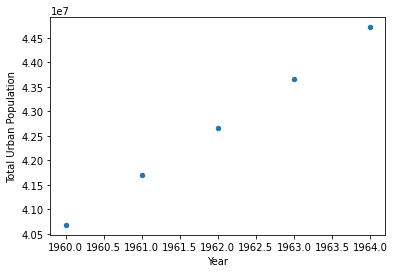

In [43]:
# Code from previous exercise
urb_pop_reader = pd.read_csv('dataset/world_ind_pop_data.csv', chunksize=1000)
df_urb_pop = next(urb_pop_reader)
df_pop_ceb = df_urb_pop[df_urb_pop['CountryCode'] == 'CEB']
pops = zip(df_pop_ceb['Total Population'], 
           df_pop_ceb['Urban population (% of total)'])
pops_list = list(pops)

# Use list comprehension to create new DataFrame column 'Total Urban Population'
df_pop_ceb['Total Urban Population'] = [int(0.01 * i[0] * i[1]) for i in pops_list]

print(df_pop_ceb.head())

# Plot urban population data
df_pop_ceb.plot(kind='scatter', x='Year', y='Total Urban Population')

處理完整的資料，因此用for loop先分別處理每個chunk的數值，最後再用 **append** 將所有資料合併 (並不會跟原始資料一樣大，因為新的dataframe只有特定的 country_code)

E:\Anaconda\lib\site-packages\ipykernel_launcher.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


<AxesSubplot:xlabel='Year', ylabel='Total Urban Population'>

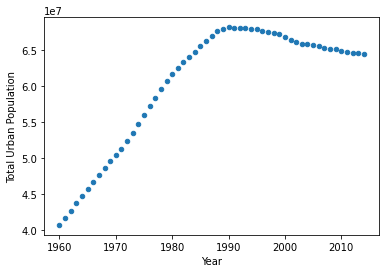

In [46]:
# Initialize reader object: urb_pop_reader
urb_pop_reader = pd.read_csv('dataset/world_ind_pop_data.csv', chunksize=1000)

# Initialize empty DataFrame: data
data = pd.DataFrame()

# Iterate over each DataFrame chunk
for df_urb_pop in urb_pop_reader:

    # Check out specific country: df_pop_ceb
    df_pop_ceb = df_urb_pop[df_urb_pop['CountryCode'] == 'CEB']

    # Zip DataFrame columns of interest: pops
    pops = zip(df_pop_ceb['Total Population'],
                df_pop_ceb['Urban population (% of total)'])

    # Turn zip object into list: pops_list
    pops_list = list(pops)

    # Use list comprehension to create new DataFrame column 'Total Urban Population'
    df_pop_ceb['Total Urban Population'] = [int(tup[0] * tup[1] * 0.01) for tup in pops_list]
    
    # Append DataFrame chunk to data: data
    data = data.append(df_pop_ceb)

# Plot urban population data
data.plot(kind='scatter', x='Year', y='Total Urban Population')

最後，將上述程式碼寫成函數，可以用來計算不同 country_code 的Total Urban Population

E:\Anaconda\lib\site-packages\ipykernel_launcher.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


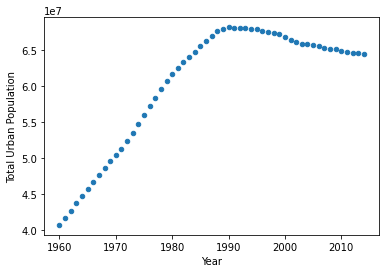

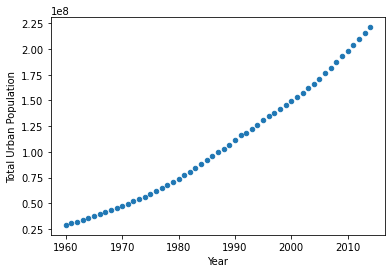

In [48]:
# Define plot_pop()
def plot_pop(filename, country_code):

    # Initialize reader object: urb_pop_reader
    urb_pop_reader = pd.read_csv(filename, chunksize=1000)

    # Initialize empty DataFrame: data
    data = pd.DataFrame()
    
    # Iterate over each DataFrame chunk
    for df_urb_pop in urb_pop_reader:
        # Check out specific country: df_pop_ceb
        df_pop_ceb = df_urb_pop[df_urb_pop['CountryCode'] == country_code]

        # Zip DataFrame columns of interest: pops
        pops = zip(df_pop_ceb['Total Population'],
                    df_pop_ceb['Urban population (% of total)'])

        # Turn zip object into list: pops_list
        pops_list = list(pops)

        # Use list comprehension to create new DataFrame column 'Total Urban Population'
        df_pop_ceb['Total Urban Population'] = [int(tup[0] * tup[1] * 0.01) for tup in pops_list]
    
        # Append DataFrame chunk to data: data
        data = data.append(df_pop_ceb)

    # Plot urban population data
    data.plot(kind='scatter', x='Year', y='Total Urban Population')


    
# 最後檢視不同的 country_code
# Set the filename: fn
fn = 'dataset/world_ind_pop_data.csv'

# Call plot_pop for country code 'CEB'
plot_pop(fn, "CEB")

# Call plot_pop for country code 'ARB'
plot_pop(fn, "ARB")